In [1]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior() 
import tensorflow as tf2
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Load the data 
df = pd.read_csv('../data/Binance_BTCUSDT_d.csv', sep=",")
df.shape

(1364, 10)

In [3]:
df = df[['date', 'low', 'high']]
df

,date,low,high
0,2021-05-10 00:00:00,58240.83,58377.67
1,2021-05-09 00:00:00,56235.66,59300.00
2,2021-05-08 00:00:00,56900.00,59500.00
3,2021-05-07 00:00:00,55241.63,58650.00
4,2021-05-06 00:00:00,55200.00,58360.00
...,...,...,...
1359,2017-08-21,3911.79,4119.62
1360,2017-08-20,4032.62,4211.08
1361,2017-08-19,3850.00,4184.69
1362,2017-08-18,3938.77,4371.52


In [4]:
nan_date, nan_low, nan_high = df['date'].isna().sum(),df['low'].isna().sum(),df['high'].isna().sum()

nan_date, nan_low, nan_high

(0, 0, 0)

In [5]:
for i in range(len(df['date'])):
    df['date'][i] = df['date'][i][:10]

df.head(), df.tail()

<ipython-input-5-5c4a5ec6c863>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = df['date'][i][:10]


(         date       low      high
 0  2021-05-10  58240.83  58377.67
 1  2021-05-09  56235.66  59300.00
 2  2021-05-08  56900.00  59500.00
 3  2021-05-07  55241.63  58650.00
 4  2021-05-06  55200.00  58360.00,
             date      low     high
 1359  2017-08-21  3911.79  4119.62
 1360  2017-08-20  4032.62  4211.08
 1361  2017-08-19  3850.00  4184.69
 1362  2017-08-18  3938.77  4371.52
 1363  2017-08-17  4200.74  4485.39)

In [6]:
df = df.sort_values('date')
type(df)

pandas.core.frame.DataFrame

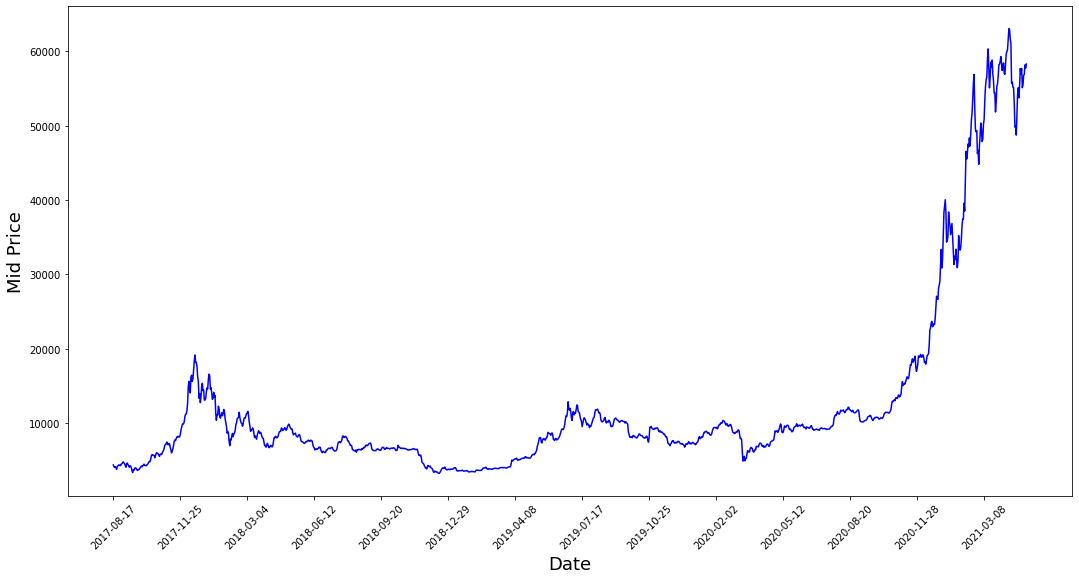

In [7]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0, color='b')
plt.xticks(range(0,df.shape[0],100),df['date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [8]:
high_prices = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0
mid_prices.shape

(1364,)

In [9]:
# Get the index 80% in the dataset
train_test_split_index = int(len(df['low'])*0.99)
type(train_test_split_index)

int

In [10]:
train_data = mid_prices[:train_test_split_index]
test_data = mid_prices[train_test_split_index:]
train_data.shape, test_data.shape

((1350,), (14,))

In [11]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)
train_data.shape, test_data.shape

((1350, 1), (14, 1))

In [12]:
smoothing_window_size = train_test_split_index//10
smoothing_window_size = int(smoothing_window_size)
type(smoothing_window_size)
print(train_test_split_index, smoothing_window_size)


1350 135


In [16]:
# Train the Scaler with training data and smooth data

for di in range(0,train_test_split_index,smoothing_window_size):
   scaler.fit(train_data[di:di+smoothing_window_size,:])
   train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data

print(di+smoothing_window_size,train_data[di:di+smoothing_window_size,:])
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

1350 [[0.        ]
 [0.00257722]
 [0.00565561]
 [0.03085756]
 [0.07846932]
 [0.08534379]
 [0.09995527]
 [0.1048799 ]
 [0.08855384]
 [0.09165189]
 [0.0974395 ]
 [0.0951432 ]
 [0.11474508]
 [0.15045413]
 [0.18174891]
 [0.17583067]
 [0.1722979 ]
 [0.20667142]
 [0.21614515]
 [0.22835161]
 [0.27403863]
 [0.32509421]
 [0.26817117]
 [0.29691043]
 [0.36469431]
 [0.43782369]
 [0.4581002 ]
 [0.4768432 ]
 [0.43550762]
 [0.34717278]
 [0.35256009]
 [0.364726  ]
 [0.43937118]
 [0.40932024]
 [0.39968793]
 [0.37009331]
 [0.38789723]
 [0.40407561]
 [0.36001537]
 [0.31293853]
 [0.27892317]
 [0.30356885]
 [0.29362756]
 [0.32559289]
 [0.29122221]
 [0.26895508]
 [0.28970948]
 [0.36719439]
 [0.33664558]
 [0.32251859]
 [0.32818772]
 [0.35532417]
 [0.39647561]
 [0.41743608]
 [0.41754853]
 [0.46629543]
 [0.44220841]
 [0.53004309]
 [0.62455255]
 [0.60108087]
 [0.61966393]
 [0.64735676]
 [0.63874327]
 [0.66565447]
 [0.64134662]
 [0.67668671]
 [0.72068095]
 [0.7418794 ]
 [0.78329915]
 [0.83425954]
 [0.85999992]
 

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [20]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)
train_data = scaler.transform(train_data)

In [21]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(train_test_split_index):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)
all_mid_data.shape
print(train_data.shape,test_data.shape)


(1350, 1) (14, 1)


In [22]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 14014939.17893


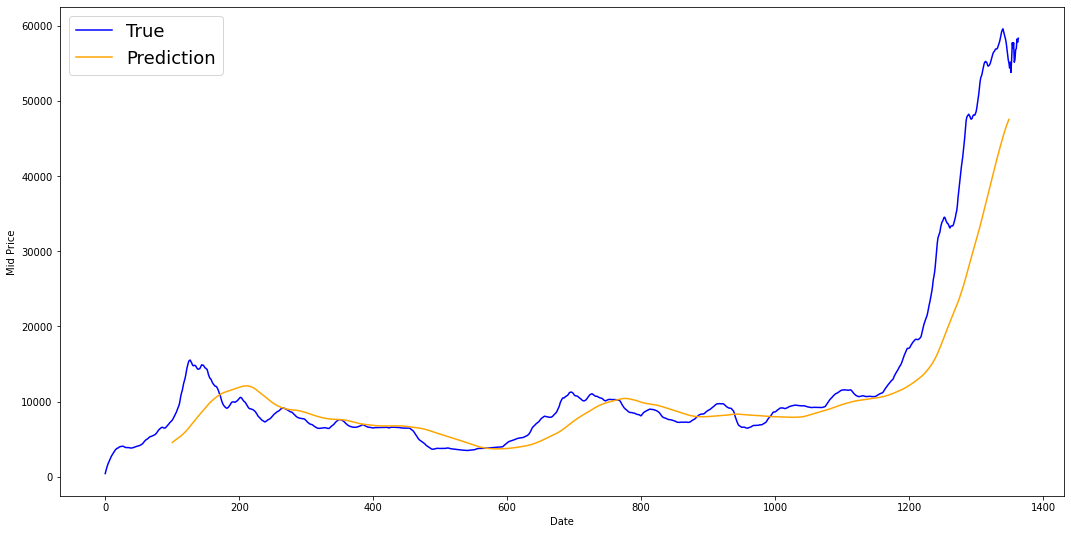

In [23]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [24]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 53949.98501


C:\Users\Gamer\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


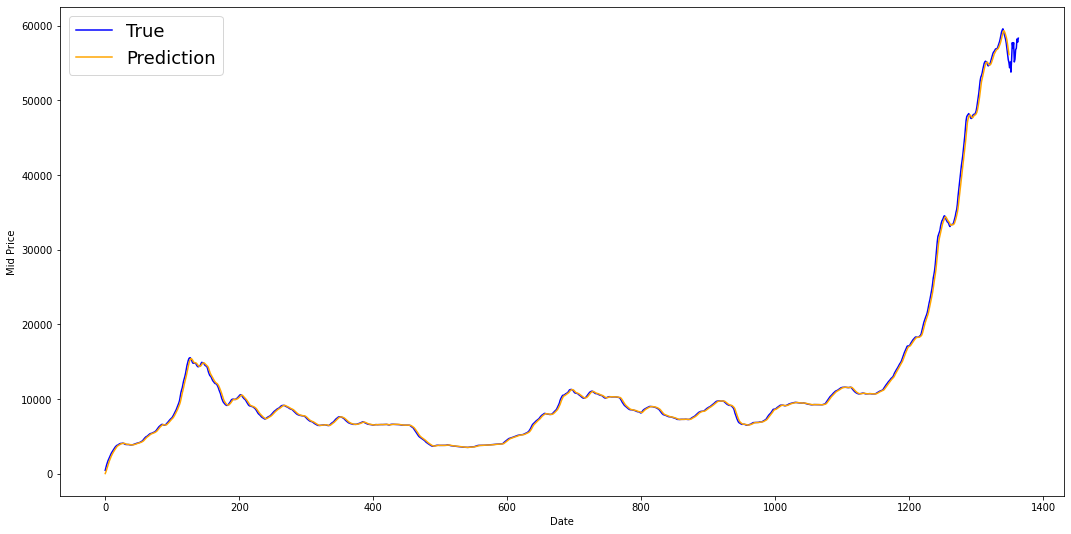

In [25]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [26]:

class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [ 434.3065 9022.405  3515.3442 8730.932  9509.071 ]

	Output: [ 806.3903 8933.759  3502.7004 8730.932  9912.322 ]


Unrolled index 1
	Inputs:  [ 806.3903 8973.232  3506.9458 8785.836  9648.525 ]

	Output: [1892.4614 8933.759  3497.0737 8785.836  9648.525 ]


Unrolled index 2
	Inputs:  [1127.4858 8933.759  3497.0737 8828.6875 9791.414 ]

	Output: [2117.1997 8779.638  3497.0737 8990.983  9912.322 ]


Unrolled index 3
	Inputs:  [1426.9222 8903.447  3502.7004 8877.295  9912.322 ]

	Output: [2117.1997 8903.447  3517.6877 8989.735  9912.322 ]


Unrolled index 4
	Inputs:  [ 1685.8005  8841.653   3517.6877  8921.102  10041.29  ]

	Output: [ 2117.1997  8636.392   3558.8508  8971.006  10304.1875]


In [27]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.compat.v1.reset_default_graph() # This is important in case you run this multiple times

In [28]:
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

In [29]:

lstm_cells = [
    tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.compat.v1.keras.initializers.glorot_normal()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.compat.v1.nn.rnn_cell.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.compat.v1.keras.initializers.glorot_normal())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

C:\Users\Gamer\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:909: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "


In [30]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.compat.v1.nn.rnn_cell.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
C:\Users\Gamer\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [31]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


In [32]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.compat.v1.nn.rnn_cell.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


In [33]:
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 5 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(1350,1364,50).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          #print(pred, all_mid_data[w_i+pred_i], w_i, pred_i)
          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

Initialized
Average loss at step 1: 1660628736.000000
<ipython-input-33-42fd2e136c3d>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  our_predictions.append(np.asscalar(pred))
	Test MSE: 1529061862.12151
	Finished Predictions
Average loss at step 2: 1711015488.000000
	Test MSE: 1529039766.56588
	Finished Predictions
Average loss at step 3: 2580524160.000000
	Test MSE: 1529017925.35933
	Finished Predictions
Average loss at step 4: 4388425984.000000
	Test MSE: 1528996312.76971
	Finished Predictions
Average loss at step 5: 4436721920.000000
	Test MSE: 1528974610.53623
	Finished Predictions
Average loss at step 6: 4555389952.000000
	Test MSE: 1528952455.93231
	Finished Predictions
Average loss at step 7: 4725592320.000000
	Test MSE: 1528929389.10470
	Finished Predictions
Average loss at step 8: 4670038016.000000
	Test MSE: 1528905586.72063
	Finished Predictions
Average loss at step 9: 4870608896.000000
	Test MSE: 1528881369.37391
	Finished Pre

<class 'range'>


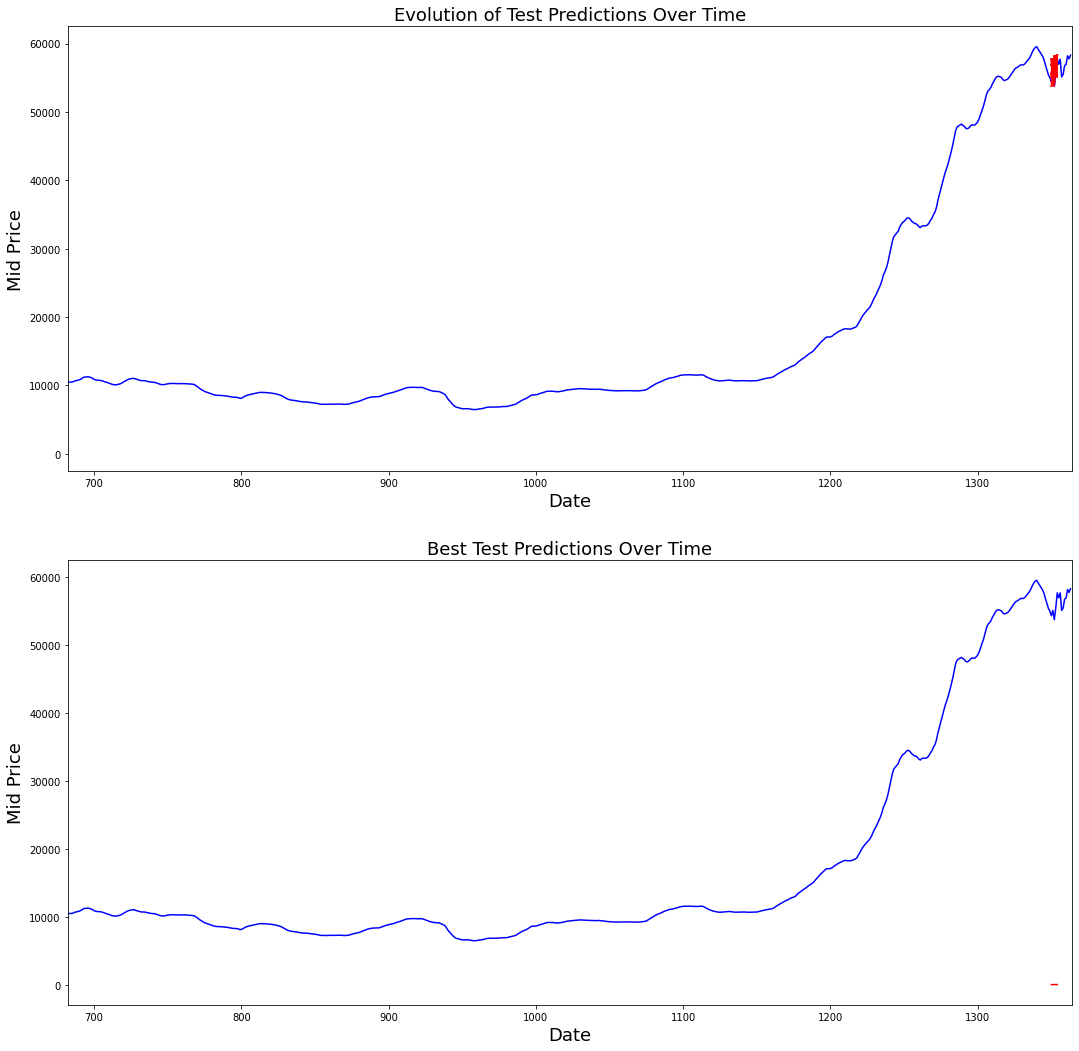

In [37]:
best_prediction_epoch = 29 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')
print(type(range(df.shape[0])))

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    #print(p_i)
    for xval,yval in zip(x_axis_seq,p):
        #print(xval,np.array(predictions_over_time[p_i]))
        plt.plot(xval,np.array(all_mid_data[1350+p_i:1350+p_i+5]+yval),color='r',alpha=alpha[p_i])
      

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(682,1364)

plt.subplot(2,1,2)


# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    #print(xval,yval)
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)


plt.ylabel('Mid Price',fontsize=18)
plt.xlim(682,1364)
plt.show()